<a href="https://colab.research.google.com/github/enesergen/TensorflowFundamentalCourseWithDaniel/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Veri görüntüleme ve fit etme

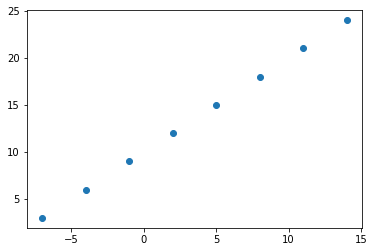

In [167]:
import numpy as np
import matplotlib.pyplot as plt

#create future
X=np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])
#create label
y=np.array([3.,6.,9.,12.,15.,18.,21.,24.])
#görselleştirme
plt.scatter(X,y)

In [168]:
y==X+10#x ve y arasındaki ilişki

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input ve Output Shapes

In [169]:
#house price prediction problem için bir tensor oluşturalım
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [170]:
#Numpy array leri tensor a dönüştürme
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# Tensorflow ile modelleme stepleri
1. Model oluşturma - input , output  , hidden layerleri tanımlama
2. Compile the model -loss function ve optimizer tanımlama
3. Fitting the model -



In [171]:
tf.random.set_seed(42)#set global random seed
#model oluşturma
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)#1 input ve 1 output olduğu için
])
#compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
#fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 305ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [172]:
#X,y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [173]:
#modele tahmin ettirme
model.predict([17]) #çok doğru tahminler yapamıyor malesef şuan için mae 8.6 yüksek bir değer şuan için 

1/1 [==============================] - 0s 56ms/step


array([[12.716021]], dtype=float32)

# Improving our model , modelimizi geliştirme kısmı
We can improve our model ,by altering the steps we took to create a model.
1. **Creating a model** -> We might add more layers,increase the number of hidden units(also called neurons) within each of the hidden layers , we might change the activation function of each layer.

2. **Compiling a model** -> We might change the optimizer function or perhaps the learning rate of the optimization function.

3. **Fitting the model** -> we might fit a model for more epochs or on more data.

In [174]:
#Lets rebuild our model
#creat the model 
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#compile the model 
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 319ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 8

In [175]:
model.predict([17]) 

1/1 [==============================] - 0s 94ms/step


array([[29.739855]], dtype=float32)

#Learning rate is most important hyperparameter in NN

In [176]:
#Lets see if we make another change to improve our model

#creating the model with extra hidden layer with 100 hidden units
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

#compiling the model 
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 367ms/step - loss: 12.0109 - mae: 12.0109
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0827 - mae: 11.0827
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 10.1377 - mae: 10.1377
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.1687 - mae: 9.1687
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1666 - mae: 8.1666
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1234 - mae: 7.1234
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.0477 - mae: 7.0477
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.4551 - mae: 7.4551
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.7955 - mae: 7.7955
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.8032 - mae: 7.8032
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - lo

In [177]:
model.predict([17.])#activation function none , optimizer adam and learning rate 0.01 olarak değiştirildi


1/1 [==============================] - 0s 197ms/step


array([[26.485748]], dtype=float32)

#Evaluating the model 
1. Veriyi görselleştirme
2. Modeli görselleştirme


In [178]:
X=tf.cast(tf.range(-100,100,4),dtype=tf.float32)
X#dataset

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [179]:
y=X+10
y#label

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

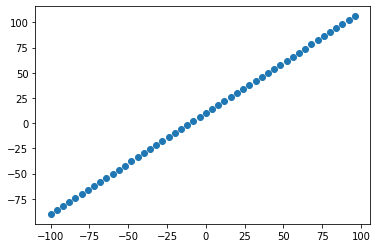

In [180]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The three sets...
* Training set ->  the model learns from this data which is 70-80% of available data.
* Validation set is 10-15% of available data
* Test set -> the model gets evaluated on this data to test what is has learned. this set is 10-15% of available data

In [181]:
len(X)

50

In [182]:
#veriseti küçük olduğu için validation seti bu seferlik atlıyoruz
#split the data into train and test set
X_train=X[:40]#ilk 40 
y_train=y[:40]

X_test=X[40:]#kalan yüzde 10 kısmı
y_test=y[40:]

###visualizing the data

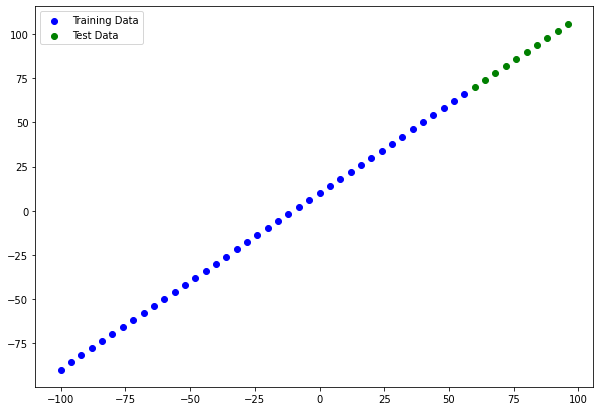

In [183]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Test Data")
plt.legend()

In [184]:
#build the  NN model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])


# Visualizing the model

In [222]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])#yukardaki ile aynı sadece input shape verdik

model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

In [223]:
model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 10)                20        
                                                                 
 dense_76 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [224]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

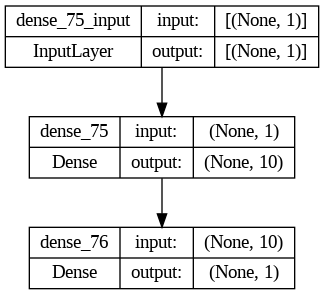

In [225]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)


# Visualizing our model's predictions

In [226]:
y_pred=model.predict(X_test)
y_pred,y_test

1/1 [==============================] - 0s 63ms/step


(array([[ 70.552185],
        [ 75.13991 ],
        [ 79.72764 ],
        [ 84.315346],
        [ 88.90308 ],
        [ 93.49081 ],
        [ 98.07852 ],
        [102.666245],
        [107.253975],
        [111.84169 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [227]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  plt.scatter(test_data,test_labels,c="g",label="Testing Data")
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()

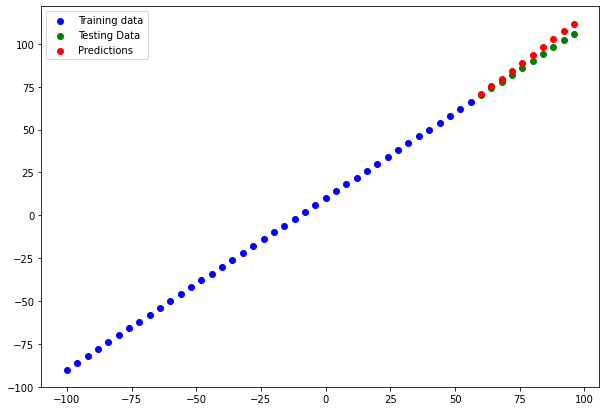

In [228]:
plot_predictions()

# Evaluating our model's predictions with regression evaluating metrics
